### Loading Data and Merging with Eval Space Columns

In [3]:
import pandas as pd
from src.stop_words import stop_words

df = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/DataGitHub/CaseStudyEval/topics_2.csv"
)

from src.explorativ_analysis_05 import split_strings_to_list

df_old = pd.read_excel("samples_cleaned.xlsx")

df_old = df_old[~df_old["topics"].isna()]
df_old = df_old[
    df_old["topics"].isin(
        ["sanctions", "unjustified_war", "arms_delivery", "people_killed"]
    )
]

to_transform = [
    "lemmas",
    "adjs_verbs",
    "nouns",
    "translated_lemmas",
    "translated_adjs_verbs",
    "translated_nouns",
]

for col in to_transform:
    df_old[col] = df_old[col].apply(split_strings_to_list)

df_old["translated_nouns_adjs_verbs"] = (
    df_old["translated_nouns"] + df_old["translated_adjs_verbs"]
)
df_old["nouns_adjs_verbs"] = df_old["nouns"] + df_old["adjs_verbs"]

df_old["stop_word_removed_lemmas"] = df_old.apply(
    lambda x: [word for word in x["lemmas"] if not word in stop_words[x["lang"]]],
    axis=1,
)
df_old["translated_stop_word_removed_lemmas"] = df_old.apply(
    lambda x: [word for word in x["translated_lemmas"] if not word in stop_words["en"]],
    axis=1,
)

df_old["translated_old"] = df_old["translated"]

df_old = df_old[
    [
        "lemmas",
        "adjs_verbs",
        "nouns",
        "translated_lemmas",
        "translated_adjs_verbs",
        "translated_nouns",
        "translated_old",
        "translated_nouns_adjs_verbs",
        "nouns_adjs_verbs",
        "stop_word_removed_lemmas",
        "translated_stop_word_removed_lemmas",
    ]
]

df = pd.merge(left=df, right=df_old, left_on="translated", right_on="translated_old")
print(df.shape)
for col in df.columns:
    print(col)

(100, 121)
Unnamed: 0
topics
translated
listed_lemmas_lda
listed_adjs_verbs_lda
listed_nouns_lda
listed_translated_lemmas_lda
listed_translated_adjs_verbs_lda
listed_translated_nouns_lda
random_topics
random_topics_best_of_1000
random_topics_best_of_100
kmeans_model_labse_text_embeddings
kmeans_model_parahprase_min_text_embeddings
kmeans_model_parahprase_max_text_embeddings
kmeans_eng_model_text_embeddings
kmeans_model_labse_translated_embeddings
kmeans_model_parahprase_min_translated_embeddings
kmeans_model_parahprase_max_translated_embeddings
kmeans_eng_model_translated_embeddings
kmeans_model_labse_cleaned_text_translated_embeddings
kmeans_model_parahprase_min_cleaned_text_translated_embeddings
kmeans_model_parahprase_max_cleaned_text_translated_embeddings
kmeans_eng_model_cleaned_text_translated_embeddings
kmeans_model_labse_cleaned_text_embeddings
kmeans_model_parahprase_min_cleaned_text_embeddings
kmeans_model_parahprase_max_cleaned_text_embeddings
kmeans_eng_model_cleaned_text_e

In [4]:
hdbscscan_topics = [
    "hdbscan_model_labse_text_embeddings",
    "hdbscan_model_parahprase_min_text_embeddings",
    "hdbscan_model_parahprase_max_text_embeddings",
    "hdbscan_eng_model_text_embeddings",
    "hdbscan_model_labse_translated_embeddings",
    "hdbscan_model_parahprase_min_translated_embeddings",
    "hdbscan_model_parahprase_max_translated_embeddings",
    "hdbscan_eng_model_translated_embeddings",
    "hdbscan_model_labse_cleaned_text_translated_embeddings",
    "hdbscan_model_parahprase_min_cleaned_text_translated_embeddings",
    "hdbscan_model_parahprase_max_cleaned_text_translated_embeddings",
    "hdbscan_eng_model_cleaned_text_translated_embeddings",
    "hdbscan_model_labse_cleaned_text_embeddings",
    "hdbscan_model_parahprase_min_cleaned_text_embeddings",
    "hdbscan_model_parahprase_max_cleaned_text_embeddings",
    "hdbscan_eng_model_cleaned_text_embeddings",
    "hdbscan_model_labse_lemmas_embeddings",
    "hdbscan_model_parahprase_min_lemmas_embeddings",
    "hdbscan_model_parahprase_max_lemmas_embeddings",
    "hdbscan_eng_model_lemmas_embeddings",
    "hdbscan_model_labse_adjs_verbs_embeddings",
    "hdbscan_model_parahprase_min_adjs_verbs_embeddings",
    "hdbscan_model_parahprase_max_adjs_verbs_embeddings",
    "hdbscan_eng_model_adjs_verbs_embeddings",
    "hdbscan_model_labse_nouns_embeddings",
    "hdbscan_model_parahprase_min_nouns_embeddings",
    "hdbscan_model_parahprase_max_nouns_embeddings",
    "hdbscan_eng_model_nouns_embeddings",
    "hdbscan_model_labse_translated_lemmas_embeddings",
    "hdbscan_model_parahprase_min_translated_lemmas_embeddings",
    "hdbscan_model_parahprase_max_translated_lemmas_embeddings",
    "hdbscan_eng_model_translated_lemmas_embeddings",
    "hdbscan_model_labse_translated_adjs_verbs_embeddings",
    "hdbscan_model_parahprase_min_translated_adjs_verbs_embeddings",
    "hdbscan_model_parahprase_max_translated_adjs_verbs_embeddings",
    "hdbscan_eng_model_translated_adjs_verbs_embeddings",
    "hdbscan_model_labse_translated_nouns_embeddings",
    "hdbscan_model_parahprase_min_translated_nouns_embeddings",
    "hdbscan_model_parahprase_max_translated_nouns_embeddings",
    "hdbscan_eng_model_translated_nouns_embeddings",
    "hdbscan_model_labse_translated_stop_word_removed_lemmas_embeddings",
    "hdbscan_model_parahprase_min_translated_stop_word_removed_lemmas_embeddings",
    "hdbscan_model_parahprase_max_translated_stop_word_removed_lemmas_embeddings",
    "hdbscan_eng_model_translated_stop_word_removed_lemmas_embeddings",
    "hdbscan_model_labse_stop_word_removed_lemmas_embeddings",
    "hdbscan_model_parahprase_min_stop_word_removed_lemmas_embeddings",
    "hdbscan_model_parahprase_max_stop_word_removed_lemmas_embeddings",
    "hdbscan_eng_model_stop_word_removed_lemmas_embeddings",
]


kmeans_topics = [
    "kmeans_model_labse_text_embeddings",
    "kmeans_model_parahprase_min_text_embeddings",
    "kmeans_model_parahprase_max_text_embeddings",
    "kmeans_eng_model_text_embeddings",
    "kmeans_model_labse_translated_embeddings",
    "kmeans_model_parahprase_min_translated_embeddings",
    "kmeans_model_parahprase_max_translated_embeddings",
    "kmeans_eng_model_translated_embeddings",
    "kmeans_model_labse_cleaned_text_translated_embeddings",
    "kmeans_model_parahprase_min_cleaned_text_translated_embeddings",
    "kmeans_model_parahprase_max_cleaned_text_translated_embeddings",
    "kmeans_eng_model_cleaned_text_translated_embeddings",
    "kmeans_model_labse_cleaned_text_embeddings",
    "kmeans_model_parahprase_min_cleaned_text_embeddings",
    "kmeans_model_parahprase_max_cleaned_text_embeddings",
    "kmeans_eng_model_cleaned_text_embeddings",
    "kmeans_model_labse_lemmas_embeddings",
    "kmeans_model_parahprase_min_lemmas_embeddings",
    "kmeans_model_parahprase_max_lemmas_embeddings",
    "kmeans_eng_model_lemmas_embeddings",
    "kmeans_model_labse_adjs_verbs_embeddings",
    "kmeans_model_parahprase_min_adjs_verbs_embeddings",
    "kmeans_model_parahprase_max_adjs_verbs_embeddings",
    "kmeans_eng_model_adjs_verbs_embeddings",
    "kmeans_model_labse_nouns_embeddings",
    "kmeans_model_parahprase_min_nouns_embeddings",
    "kmeans_model_parahprase_max_nouns_embeddings",
    "kmeans_eng_model_nouns_embeddings",
    "kmeans_model_labse_translated_lemmas_embeddings",
    "kmeans_model_parahprase_min_translated_lemmas_embeddings",
    "kmeans_model_parahprase_max_translated_lemmas_embeddings",
    "kmeans_eng_model_translated_lemmas_embeddings",
    "kmeans_model_labse_translated_adjs_verbs_embeddings",
    "kmeans_model_parahprase_min_translated_adjs_verbs_embeddings",
    "kmeans_model_parahprase_max_translated_adjs_verbs_embeddings",
    "kmeans_eng_model_translated_adjs_verbs_embeddings",
    "kmeans_model_labse_translated_nouns_embeddings",
    "kmeans_model_parahprase_min_translated_nouns_embeddings",
    "kmeans_model_parahprase_max_translated_nouns_embeddings",
    "kmeans_eng_model_translated_nouns_embeddings",
    "kmeans_model_labse_translated_stop_word_removed_lemmas_embeddings",
    "kmeans_model_parahprase_min_translated_stop_word_removed_lemmas_embeddings",
    "kmeans_model_parahprase_max_translated_stop_word_removed_lemmas_embeddings",
    "kmeans_eng_model_translated_stop_word_removed_lemmas_embeddings",
    "kmeans_model_labse_stop_word_removed_lemmas_embeddings",
    "kmeans_model_parahprase_min_stop_word_removed_lemmas_embeddings",
    "kmeans_model_parahprase_max_stop_word_removed_lemmas_embeddings",
    "kmeans_eng_model_stop_word_removed_lemmas_embeddings",
]

other_topics = [
    "topics",
    "listed_lemmas_lda",
    "listed_adjs_verbs_lda",
    "listed_nouns_lda",
    "listed_translated_lemmas_lda",
    "listed_translated_adjs_verbs_lda",
    "listed_translated_nouns_lda",
    "listed_translated_stop_word_removed_lemmas_lda",
    "listed_stop_word_removed_lemmas_lda",
    "random_topics_best_of_1000",
    "random_topics_best_of_100",
]

all_topics = [*hdbscscan_topics, *kmeans_topics, *other_topics]

### Metrics

In [5]:
from src.metrics import calculate_metrics_weighted_sorted
import numpy as np


def get_metrics(
    df: pd.DataFrame, topics: list[int], eval_space: str, my_topic: str = "topics"
) -> dict[str, float]:
    topic_series = pd.Series(topics)
    topic_series = topic_series[topic_series != -1]

    return {
        **calculate_metrics_weighted_sorted(df, topics, eval_space),
        "score": (np.array(df[my_topic].to_list()) == np.array(topics)).sum() / 100,
    }

## Define Evaluating Spaces

In [6]:
df.columns

Index(['Unnamed: 0', 'topics', 'translated', 'listed_lemmas_lda',
       'listed_adjs_verbs_lda', 'listed_nouns_lda',
       'listed_translated_lemmas_lda', 'listed_translated_adjs_verbs_lda',
       'listed_translated_nouns_lda', 'random_topics',
       ...
       'adjs_verbs', 'nouns', 'translated_lemmas', 'translated_adjs_verbs',
       'translated_nouns', 'translated_old', 'translated_nouns_adjs_verbs',
       'nouns_adjs_verbs', 'stop_word_removed_lemmas',
       'translated_stop_word_removed_lemmas'],
      dtype='object', length=121)

In [7]:
word_spaces = [
    "translated_nouns_adjs_verbs",
    "nouns_adjs_verbs",
    "translated_stop_word_removed_lemmas",
    "stop_word_removed_lemmas",
]

for x in word_spaces:
    print(x in df.columns)

True
True
True
True


### Calculate all the scores

In [8]:
get_metrics(df, df[all_topics[0]], "stop_word_removed_lemmas")

{'coherence': -0.10253609960984628, 'diversity': 0.82, 'score': 0.8}

In [15]:
from tqdm import tqdm

scores = []

for topic in tqdm(all_topics):
    for word in word_spaces:
        score = {**get_metrics(df, df[topic], word), "topic": topic, "eval": word}
        scores.append(score)

  0%|          | 0/107 [00:00<?, ?it/s]

100%|██████████| 107/107 [15:19<00:00,  8.59s/it]


In [18]:
pd.DataFrame(scores).to_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/DataGitHub/CaseStudyEval/all_scores.csv"
)

In [19]:
df = pd.DataFrame(scores)

In [20]:
df.head()

,coherence,diversity,score,topic,eval
0,-0.098692,0.780,0.80,hdbscan_model_labse_text_embeddings,translated_nouns_adjs_verbs
1,-0.103658,0.835,0.80,hdbscan_model_labse_text_embeddings,nouns_adjs_verbs
2,-0.096169,0.815,0.80,hdbscan_model_labse_text_embeddings,translated_stop_word_removed_lemmas
3,-0.102536,0.820,0.80,hdbscan_model_labse_text_embeddings,stop_word_removed_lemmas
4,-0.113055,0.740,0.78,hdbscan_model_parahprase_min_text_embeddings,translated_nouns_adjs_verbs


In [77]:
df_pivot = df.pivot_table(
    index=["topic", "score"], columns=["eval"], values=["coherence", "diversity"]
)
df_pivot.columns = [
    x + "_" + y
    for x, y in zip(
        df_pivot.columns.get_level_values(0), df_pivot.columns.get_level_values(1)
    )
]
df_pivot = df_pivot.reset_index()
df_pivot

,topic,score,coherence_nouns_adjs_verbs,coherence_stop_word_removed_lemmas,coherence_translated_nouns_adjs_verbs,coherence_translated_stop_word_removed_lemmas,diversity_nouns_adjs_verbs,diversity_stop_word_removed_lemmas,diversity_translated_nouns_adjs_verbs,diversity_translated_stop_word_removed_lemmas
0,hdbscan_eng_model_adjs_verbs_embeddings,0.33,-0.109494,-0.106692,-0.103739,-0.105559,0.94375,0.93125,0.71875,0.73750
1,hdbscan_eng_model_cleaned_text_embeddings,0.36,-0.071062,-0.070944,-0.089425,-0.088416,0.81000,0.81500,0.60500,0.61000
2,hdbscan_eng_model_cleaned_text_translated_embe...,0.85,-0.122096,-0.122846,-0.103160,-0.104903,0.84375,0.81875,0.81250,0.82500
3,hdbscan_eng_model_lemmas_embeddings,0.38,-0.061153,-0.063526,-0.080733,-0.077116,0.78000,0.78000,0.60000,0.60500
4,hdbscan_eng_model_nouns_embeddings,0.43,-0.087741,-0.083903,-0.095500,-0.093911,0.92500,0.91500,0.73000,0.73500
...,...,...,...,...,...,...,...,...,...,...
102,listed_translated_nouns_lda,0.48,-0.124759,-0.125733,-0.105533,-0.106100,0.78750,0.76250,0.72500,0.75625
103,listed_translated_stop_word_removed_lemmas_lda,0.48,-0.114461,-0.112779,-0.108430,-0.106530,0.83750,0.80625,0.70625,0.72500
104,random_topics_best_of_100,0.39,-0.121039,-0.123195,-0.112296,-0.111266,0.76875,0.73125,0.67500,0.68750
105,random_topics_best_of_1000,0.41,-0.126408,-0.129406,-0.106747,-0.109515,0.76250,0.75000,0.66250,0.66875


In [63]:
df_labse = df_pivot[df_pivot["topic"].str.contains("model_labse")]

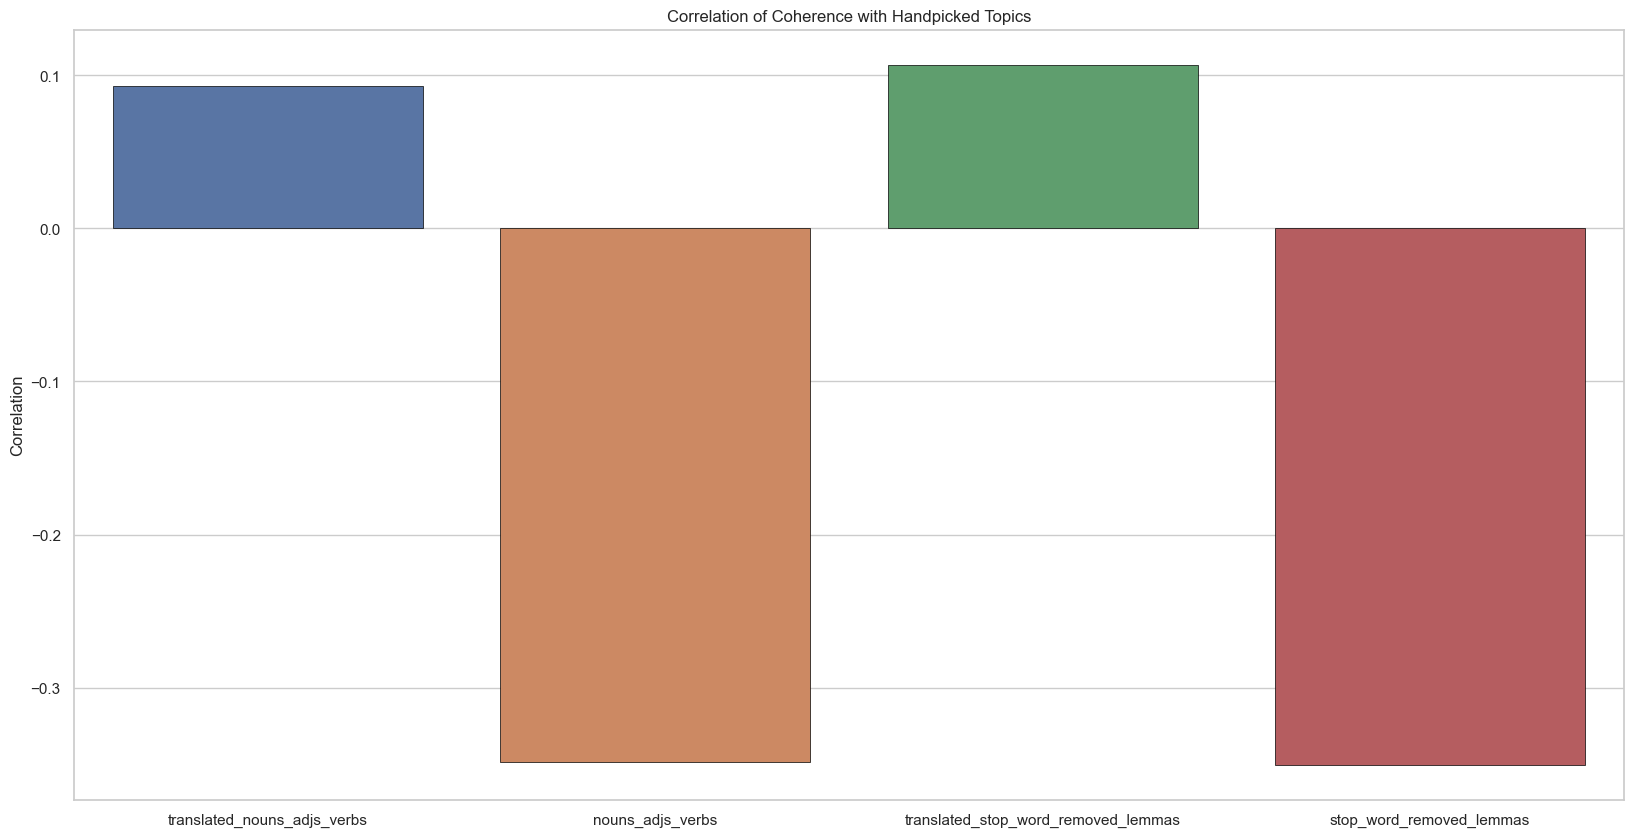

In [108]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

score_names = ["coherence"]
word_spaces = [
    "translated_nouns_adjs_verbs",
    "nouns_adjs_verbs",
    "translated_stop_word_removed_lemmas",
    "stop_word_removed_lemmas",
]
corr_value = {}
for score_name in score_names:
    for word in word_spaces:
        corr_value[word] = df_pivot["score"].corr(df_pivot[score_name + "_" + word])
df_corr = pd.DataFrame(corr_value, index=[1])
plt.rcParams["figure.figsize"] = [20, 10]
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.set_context(rc={"patch.linewidth": 0.5})
ax = sns.barplot(df_corr, edgecolor="black")
ax.set_title("Correlation of Coherence with Handpicked Topics")
ax.set(ylabel="Correlation")

sns.set_context("notebook")

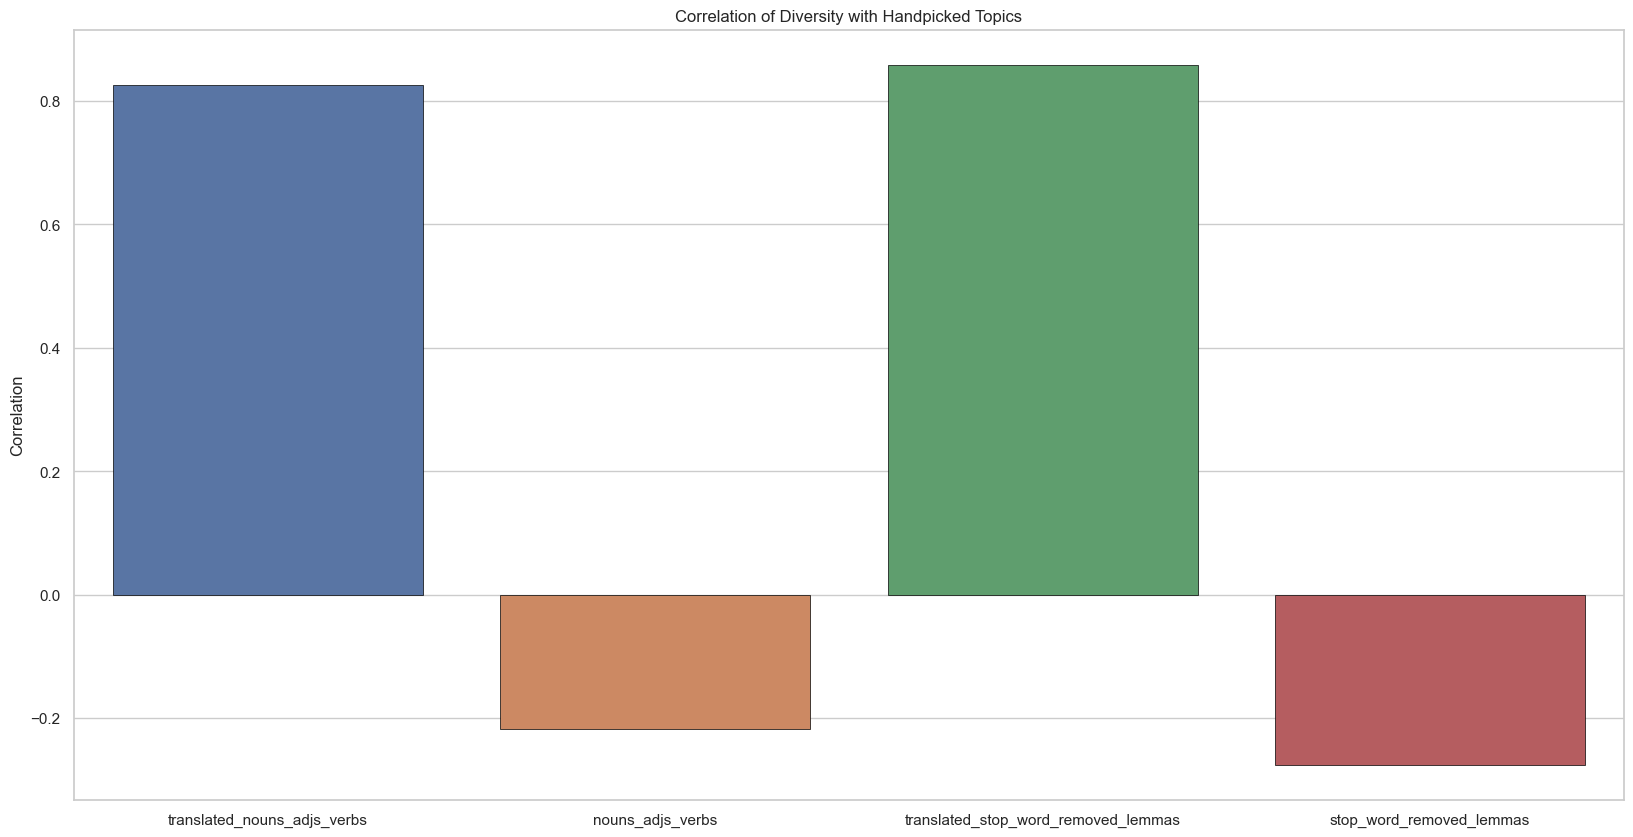

In [107]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

score_names = ["diversity"]
word_spaces = [
    "translated_nouns_adjs_verbs",
    "nouns_adjs_verbs",
    "translated_stop_word_removed_lemmas",
    "stop_word_removed_lemmas",
]
corr_value = {}
for score_name in score_names:
    for word in word_spaces:
        corr_value[word] = df_pivot["score"].corr(df_pivot[score_name + "_" + word])
df_corr = pd.DataFrame(corr_value, index=[1])
plt.rcParams["figure.figsize"] = [20, 10]
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.set_context(rc={"patch.linewidth": 0.5})
ax = sns.barplot(df_corr, edgecolor="black")
ax.set_title("Correlation of Diversity with Handpicked Topics")
ax.set(ylabel="Correlation")

sns.set_context("notebook")

In [110]:
df_pivot = df_pivot[
    [
        "topic",
        "score",
        "coherence_translated_stop_word_removed_lemmas",
        "diversity_translated_stop_word_removed_lemmas",
    ]
]

In [111]:
df_pivot

,topic,score,coherence_translated_stop_word_removed_lemmas,diversity_translated_stop_word_removed_lemmas
0,hdbscan_eng_model_adjs_verbs_embeddings,0.33,-0.105559,0.73750
1,hdbscan_eng_model_cleaned_text_embeddings,0.36,-0.088416,0.61000
2,hdbscan_eng_model_cleaned_text_translated_embe...,0.85,-0.104903,0.82500
3,hdbscan_eng_model_lemmas_embeddings,0.38,-0.077116,0.60500
4,hdbscan_eng_model_nouns_embeddings,0.43,-0.093911,0.73500
...,...,...,...,...
102,listed_translated_nouns_lda,0.48,-0.106100,0.75625
103,listed_translated_stop_word_removed_lemmas_lda,0.48,-0.106530,0.72500
104,random_topics_best_of_100,0.39,-0.111266,0.68750
105,random_topics_best_of_1000,0.41,-0.109515,0.66875


In [129]:
models = ["eng_model", "lda", "random", "labse", "parahprase_max", "parahprase_min"]


def model_from_topic(topic: str):
    for m in models:
        if m in topic:
            return m
    if topic == "topics":
        return "handpicked"
    return ""


df_pivot["model"] = df_pivot["topic"].apply(model_from_topic)

df_pivot["translated"] = df_pivot["topic"].apply(lambda x: "translated" in x)


pre_processing_steps = [
    "text",
    "translated",
    "cleaned_text_translated",
    "cleaned_text",
    "lemmas",
    "adjs_verbs",
    "nouns",
    "translated_lemmas",
    "translated_adjs_verbs",
    "translated_nouns",
    "translated_stop_word_removed_lemmas",
    "stop_word_removed_lemmas",
]

/var/folders/5b/fxkcp_lx10z530m0yx_l70n00000gn/T/ipykernel_91603/3634373941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['model'] = df_pivot['topic'].apply(model_from_topic)
/var/folders/5b/fxkcp_lx10z530m0yx_l70n00000gn/T/ipykernel_91603/3634373941.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['translated'] = df_pivot['topic'].apply(lambda x: "translated" in x)


In [130]:
df_pivot

,topic,score,coherence_translated_stop_word_removed_lemmas,diversity_translated_stop_word_removed_lemmas,model,translated
0,hdbscan_eng_model_adjs_verbs_embeddings,0.33,-0.105559,0.73750,eng_model,False
1,hdbscan_eng_model_cleaned_text_embeddings,0.36,-0.088416,0.61000,eng_model,False
2,hdbscan_eng_model_cleaned_text_translated_embe...,0.85,-0.104903,0.82500,eng_model,True
3,hdbscan_eng_model_lemmas_embeddings,0.38,-0.077116,0.60500,eng_model,False
4,hdbscan_eng_model_nouns_embeddings,0.43,-0.093911,0.73500,eng_model,False
...,...,...,...,...,...,...
102,listed_translated_nouns_lda,0.48,-0.106100,0.75625,lda,True
103,listed_translated_stop_word_removed_lemmas_lda,0.48,-0.106530,0.72500,lda,True
104,random_topics_best_of_100,0.39,-0.111266,0.68750,random,False
105,random_topics_best_of_1000,0.41,-0.109515,0.66875,random,False


Text(0.5, 1.0, 'Number of Hashtags per Tweet per Language. Outliers hidden.')

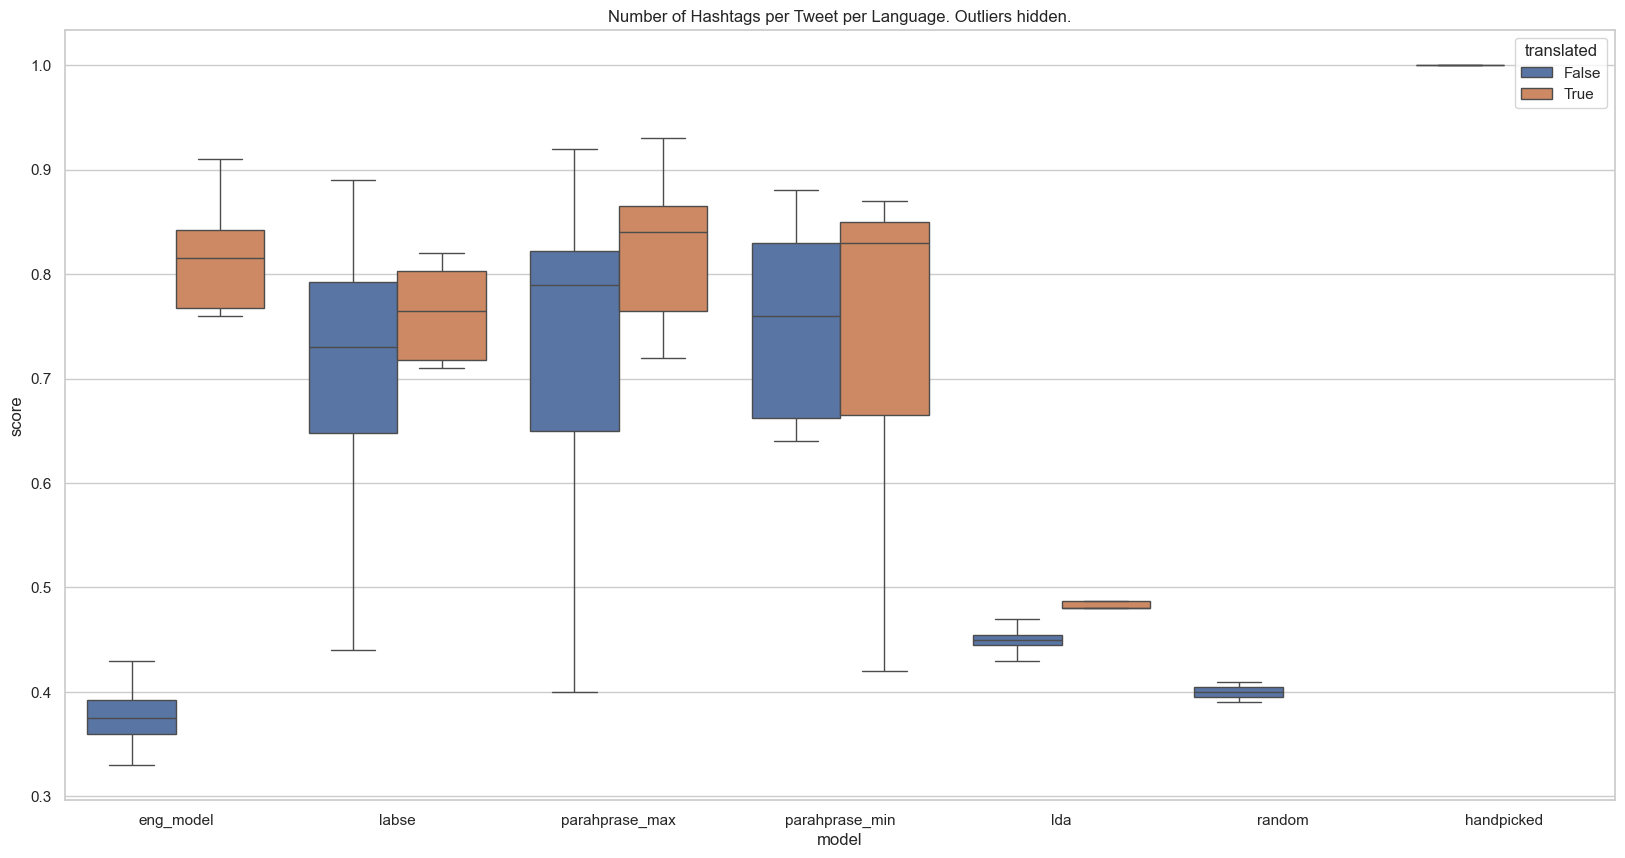

In [132]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(
    data=df_pivot, x="model", y="score", hue="translated", showfliers=False
)
ax.set_title("Number of Hashtags per Tweet per Language. Outliers hidden.")